**Run the two cells below before you begin. These will set the notebook to autosave every 10 seconds, import the necessary libraries for this challenge, and set figure appearance.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 4

**To begin, import data set `cleaned_data.csv` and create lists of feature names for the remaining financial features: `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`,  `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, and `'PAY_AMT6'`.**

**Name the features `bill_feats` and `pay_amt_feats`, respectively.**

In [3]:
# Import the dataset
data = pd.read_csv('cleaned_data.csv')

In [4]:
# Create lists `bill_feats` and `pay_amt_feats`
bill_feats = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_amt_feats = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

____________________________________________________________________________________
**Next, use `.describe()` to examine statistical summaries of the bill amount features**


In [5]:
data[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


Reflect on what you see. Does it make sense?

___________________________________________________________________________________
**Then you should visualize the bill amount features using a 2 by 3 grid of histogram plots.**
> Hint: You can use 20 bins for this visualization.

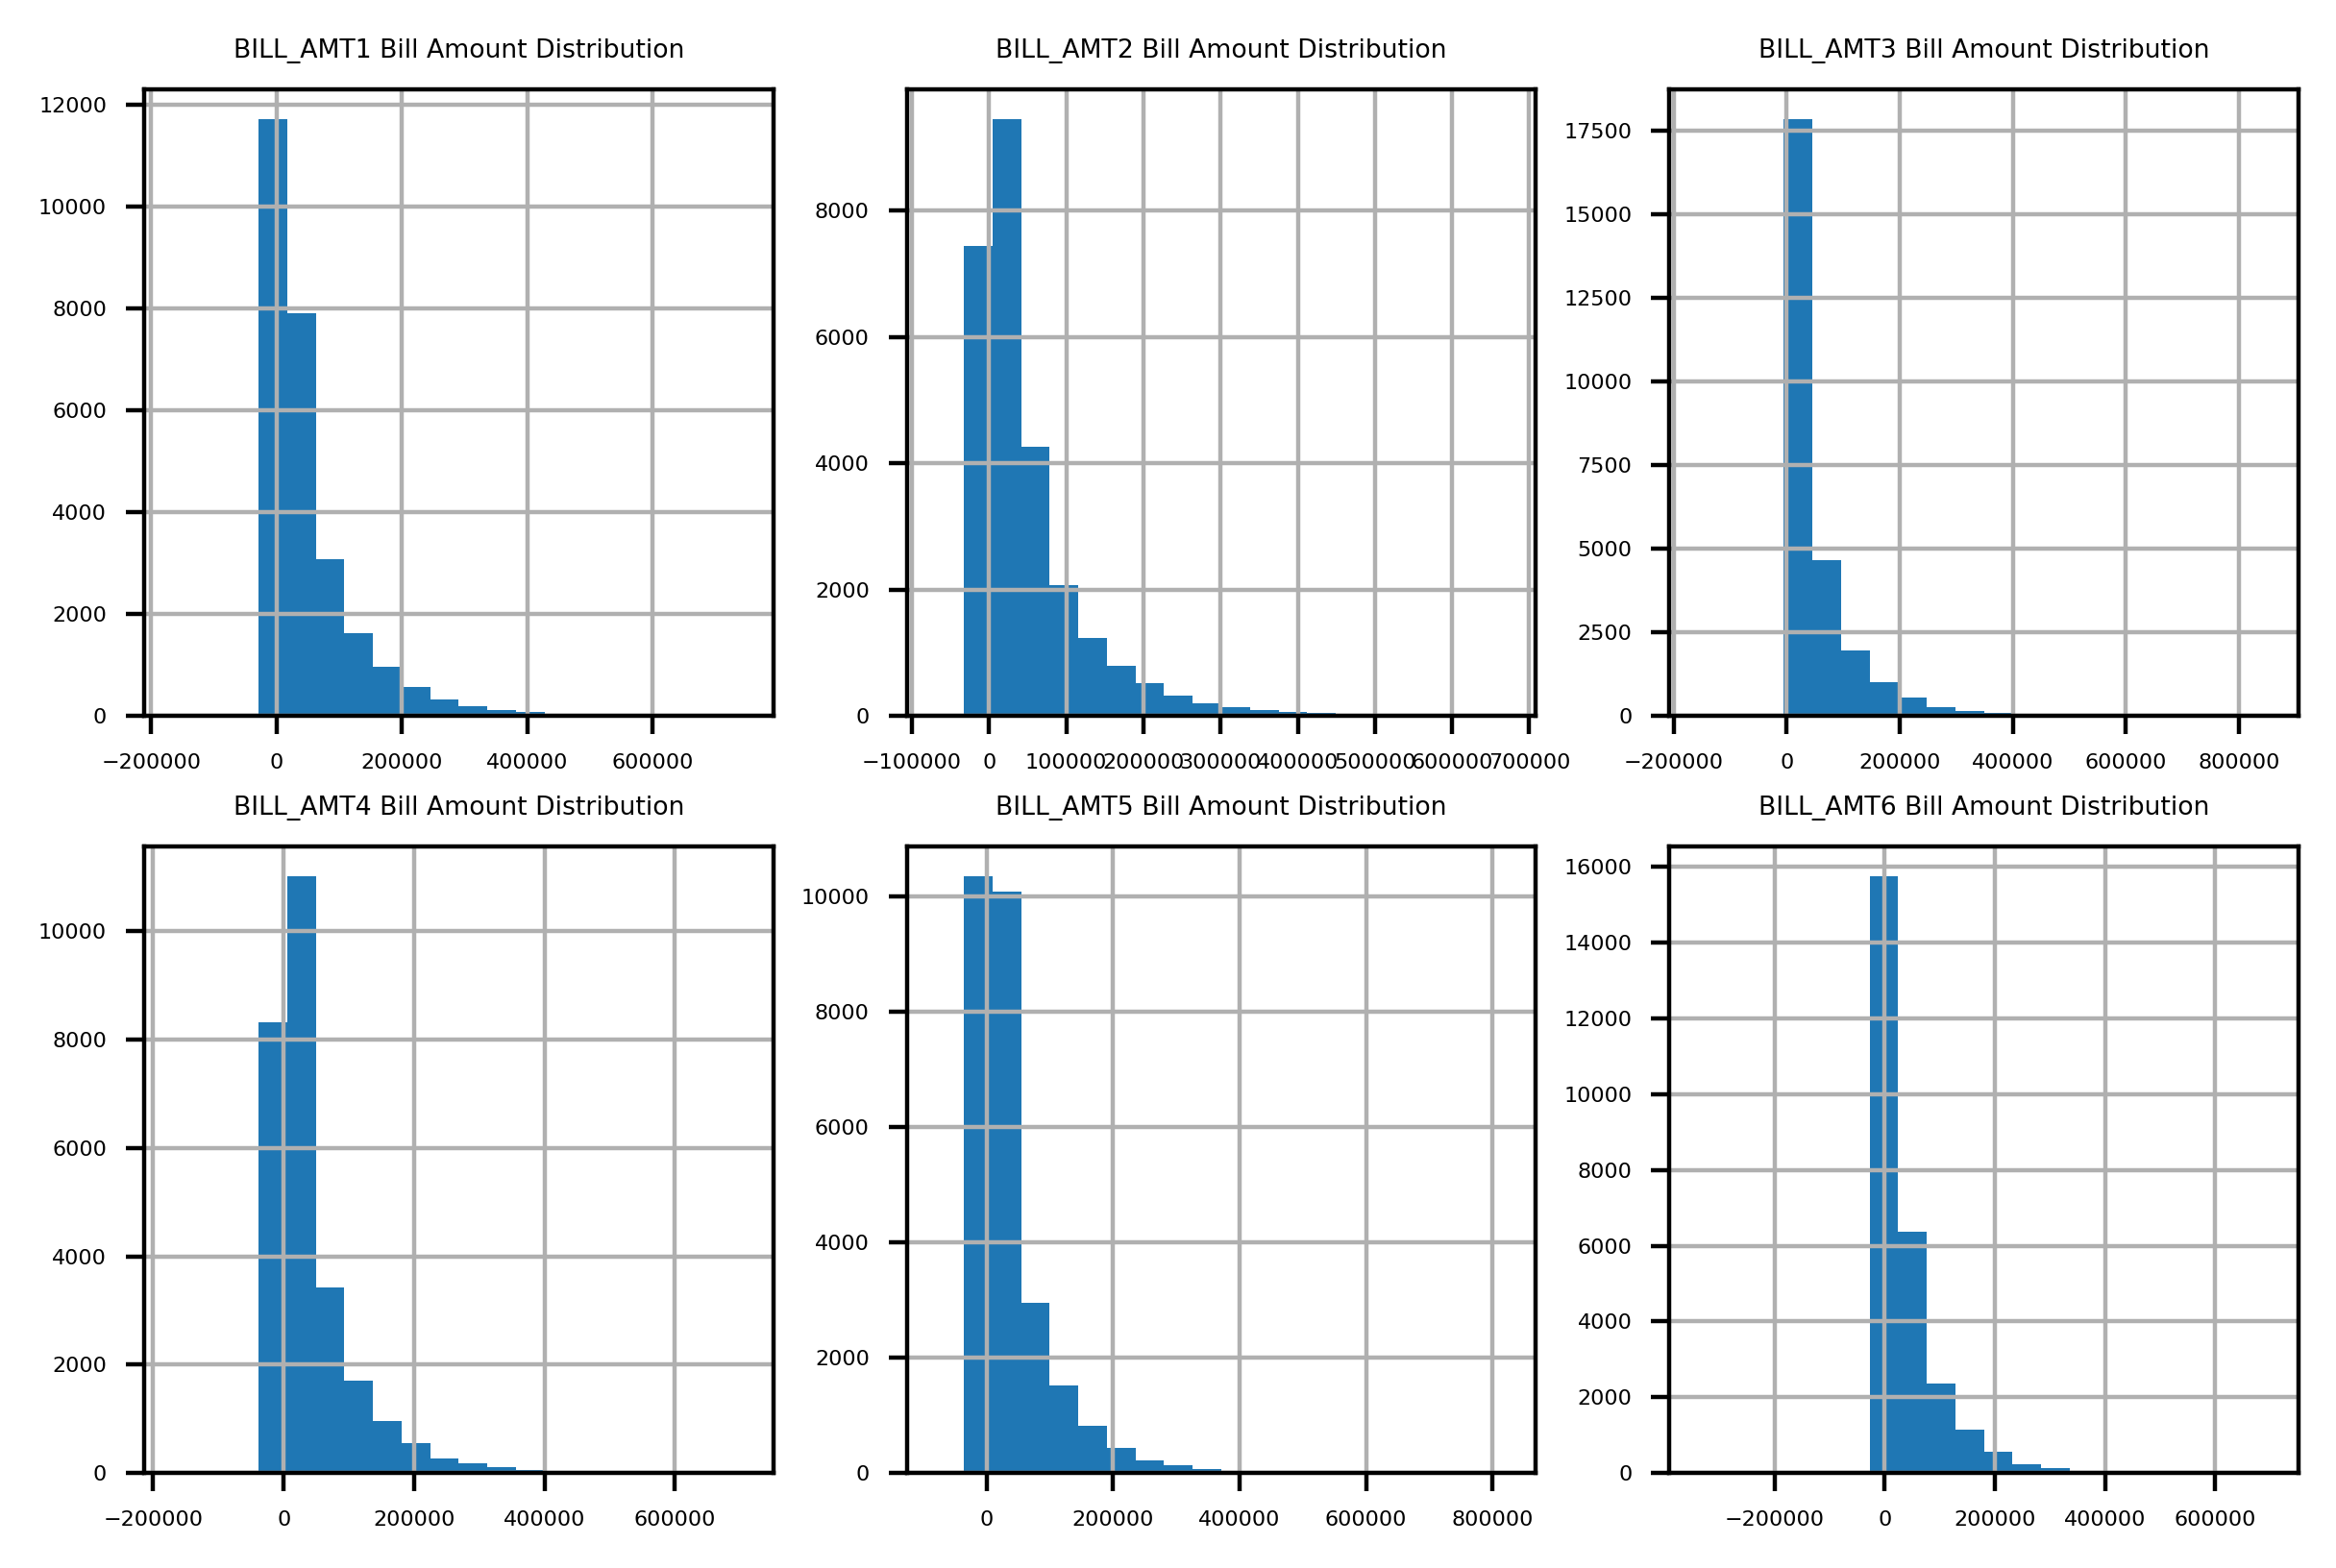

In [6]:
def draw_histograms(df, variables, n_rows, n_cols,x=0):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=20,ax=ax,xrot=x)
        ax.set_title(var_name+" Bill Amount Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms(data, bill_feats, 2, 3)

________________________________________________________________________
**Next, obtain the `.describe()` summary of the payment amount features.**


In [7]:
data[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


    Does this make sense?

_______________________________________________________________________________________
**Next, plot a histogram of the bill payment features similar to the bill amount features, 
but also apply some rotation to the x-axis labels with the `xrot` keyword argument 
so that they don't overlap. In any plotting function, you can include the `xrot=<angle>`
keyword argument to rotate x-axis labels by a given angle in degrees.**


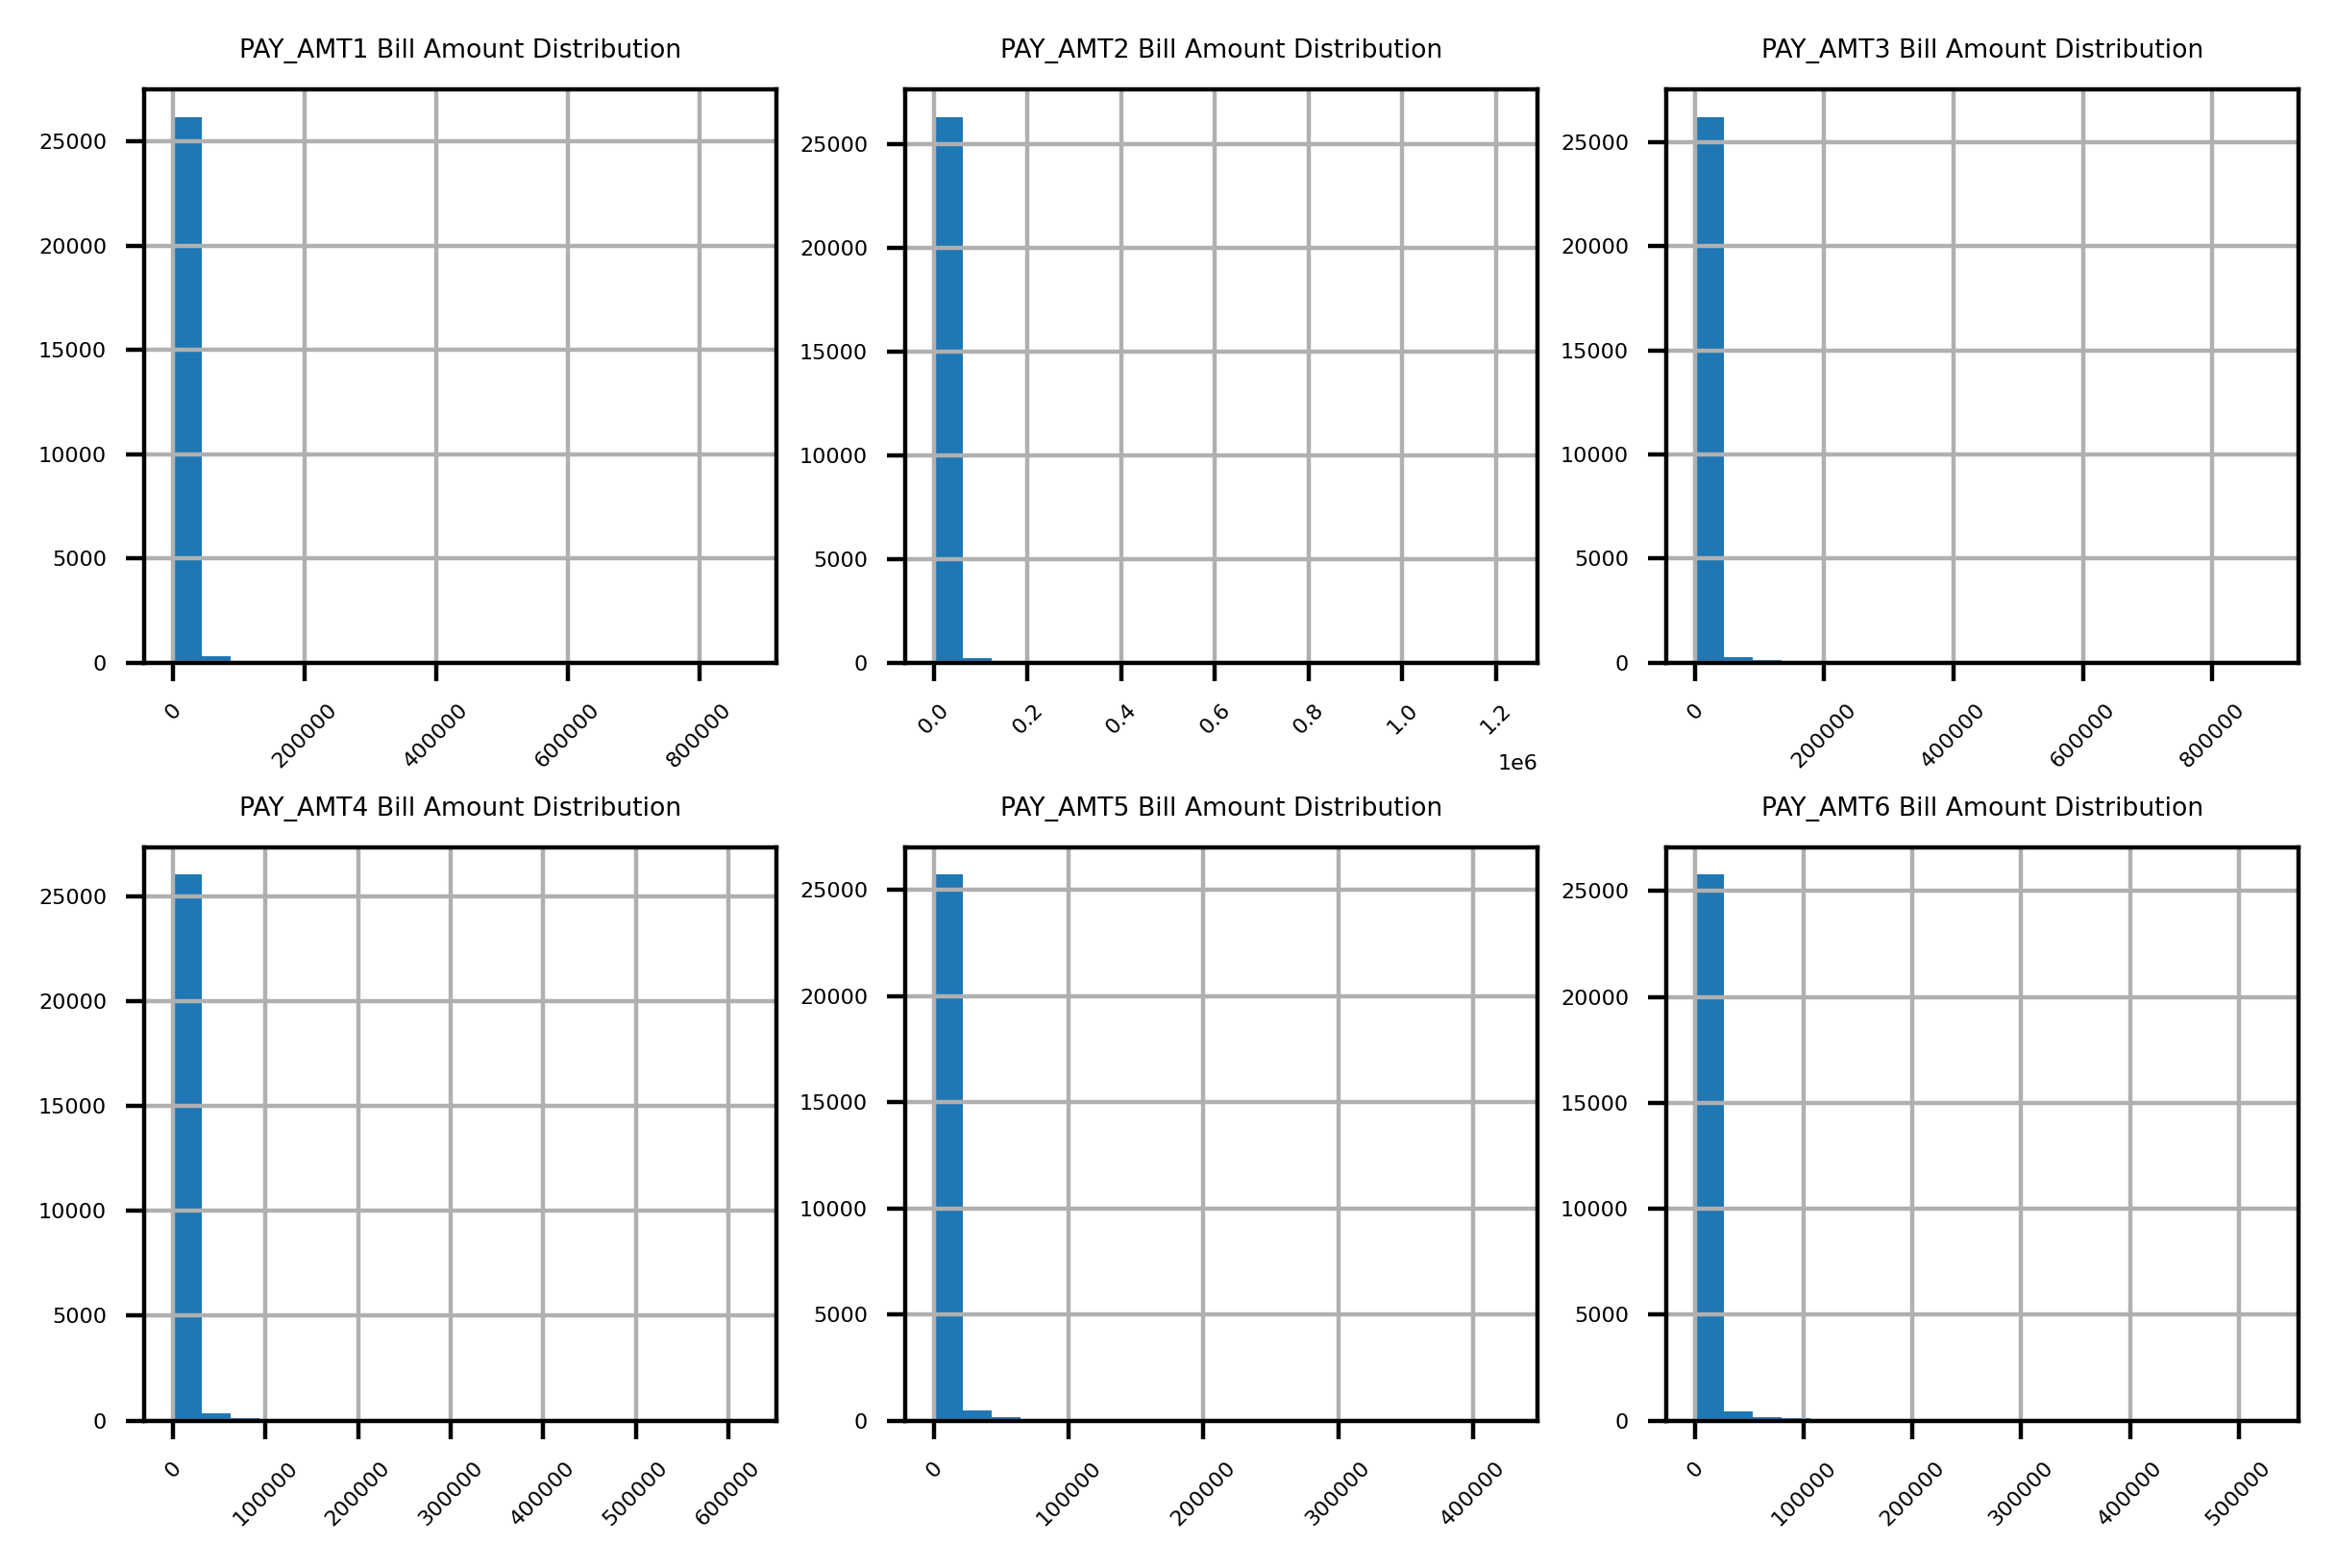

In [8]:
draw_histograms(data, pay_amt_feats, 2, 3,45)

    Consider these results.

______________________________________________________________________________________________
**Then, use a Boolean mask to see how many of the payment amount data are exactly equal to 0. Review the results of the generated mask using `.head()` and `.sum()`.**



In [10]:
# Create Boolean mask
df_zero_mask = data==0
pay_amt_feat_zero_mask = df_zero_mask.loc[:,pay_amt_feats].all(axis=1)
pay_amt_feat_zero_mask.value_counts()

False    25386
True      1278
dtype: int64

In [11]:
# Use `.head()`
pay_amt_feat_zero_mask.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [12]:
# Use `.sum()`
print(pay_amt_feat_zero_mask.value_counts())
pay_amt_feat_zero_mask.sum()

False    25386
True      1278
dtype: int64


1278

     Does this make sense given the histogram in the previous step?

_______________________________________________________________________________________________________________________________
**Finally, ignoring the payments of 0 using the mask you created in the previous step, use pandas `.apply()` and NumPy's `np.log10()` to plot histograms of logarithmic transformations of the non-zero payments.**
> Hint: You can use `.apply()` to apply any function, including `log10`, to all the elements of a DataFrame or a column using the following syntax: `.apply(<function_name>)`.

In [13]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()


In [14]:
#obtaining the dataframe having values with non-zero payments
#taking index of rows having zero payments
remove_rows = []
for i in range(len(pay_amt_feat_zero_mask)):
  if pay_amt_feat_zero_mask[i]==True:
    remove_rows.append(i)
print(remove_rows)

[17, 18, 42, 72, 100, 112, 113, 116, 129, 158, 198, 234, 247, 249, 264, 289, 306, 320, 335, 337, 354, 377, 382, 404, 431, 451, 491, 492, 527, 537, 561, 563, 569, 572, 586, 625, 628, 648, 714, 744, 750, 767, 769, 787, 799, 808, 820, 846, 877, 883, 890, 893, 898, 912, 981, 1004, 1010, 1013, 1031, 1058, 1123, 1196, 1197, 1204, 1215, 1234, 1236, 1316, 1321, 1339, 1354, 1355, 1378, 1390, 1442, 1457, 1481, 1491, 1513, 1518, 1569, 1576, 1607, 1638, 1658, 1693, 1738, 1742, 1751, 1758, 1759, 1766, 1767, 1773, 1775, 1777, 1781, 1795, 1827, 1847, 1861, 1864, 1932, 1938, 1942, 2063, 2065, 2072, 2125, 2134, 2163, 2205, 2258, 2270, 2279, 2280, 2302, 2308, 2316, 2333, 2335, 2353, 2359, 2396, 2445, 2466, 2467, 2506, 2507, 2594, 2627, 2645, 2649, 2690, 2737, 2767, 2769, 2823, 2833, 2834, 2854, 2882, 2896, 2902, 2903, 2914, 2922, 2933, 2943, 2971, 2993, 2996, 3011, 3019, 3023, 3088, 3105, 3161, 3173, 3189, 3210, 3223, 3224, 3284, 3291, 3307, 3310, 3316, 3319, 3330, 3338, 3342, 3349, 3374, 3392, 3401, 34

In [15]:
df1 = data.drop(remove_rows,axis=0)
df1.shape

(25386, 30)

In [17]:
df1[pay_amt_feats].head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679


In [20]:
df2 =  pd.DataFrame(min_max_scaler.fit_transform(df1[pay_amt_feats]), columns=pay_amt_feats)
df2.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.000000,0.000561,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000815,0.001125,0.001610,0.000000,0.003783
2,0.001738,0.001222,0.001125,0.001610,0.002345,0.009458
3,0.002290,0.001645,0.001350,0.001771,0.002506,0.001892
4,0.002290,0.029893,0.011248,0.014493,0.001615,0.001284


In [21]:
df2.describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000
mean,0.006858,0.005034,0.006214,0.008266,0.011928,0.010446
std,0.019534,0.017684,0.019857,0.026271,0.036698,0.034111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001374,0.000857,0.000755,0.000709,0.000974,0.000734
50%,0.002724,0.001793,0.002250,0.002738,0.004140,0.003216
75%,0.006104,0.004091,0.005624,0.007085,0.010433,0.008232
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


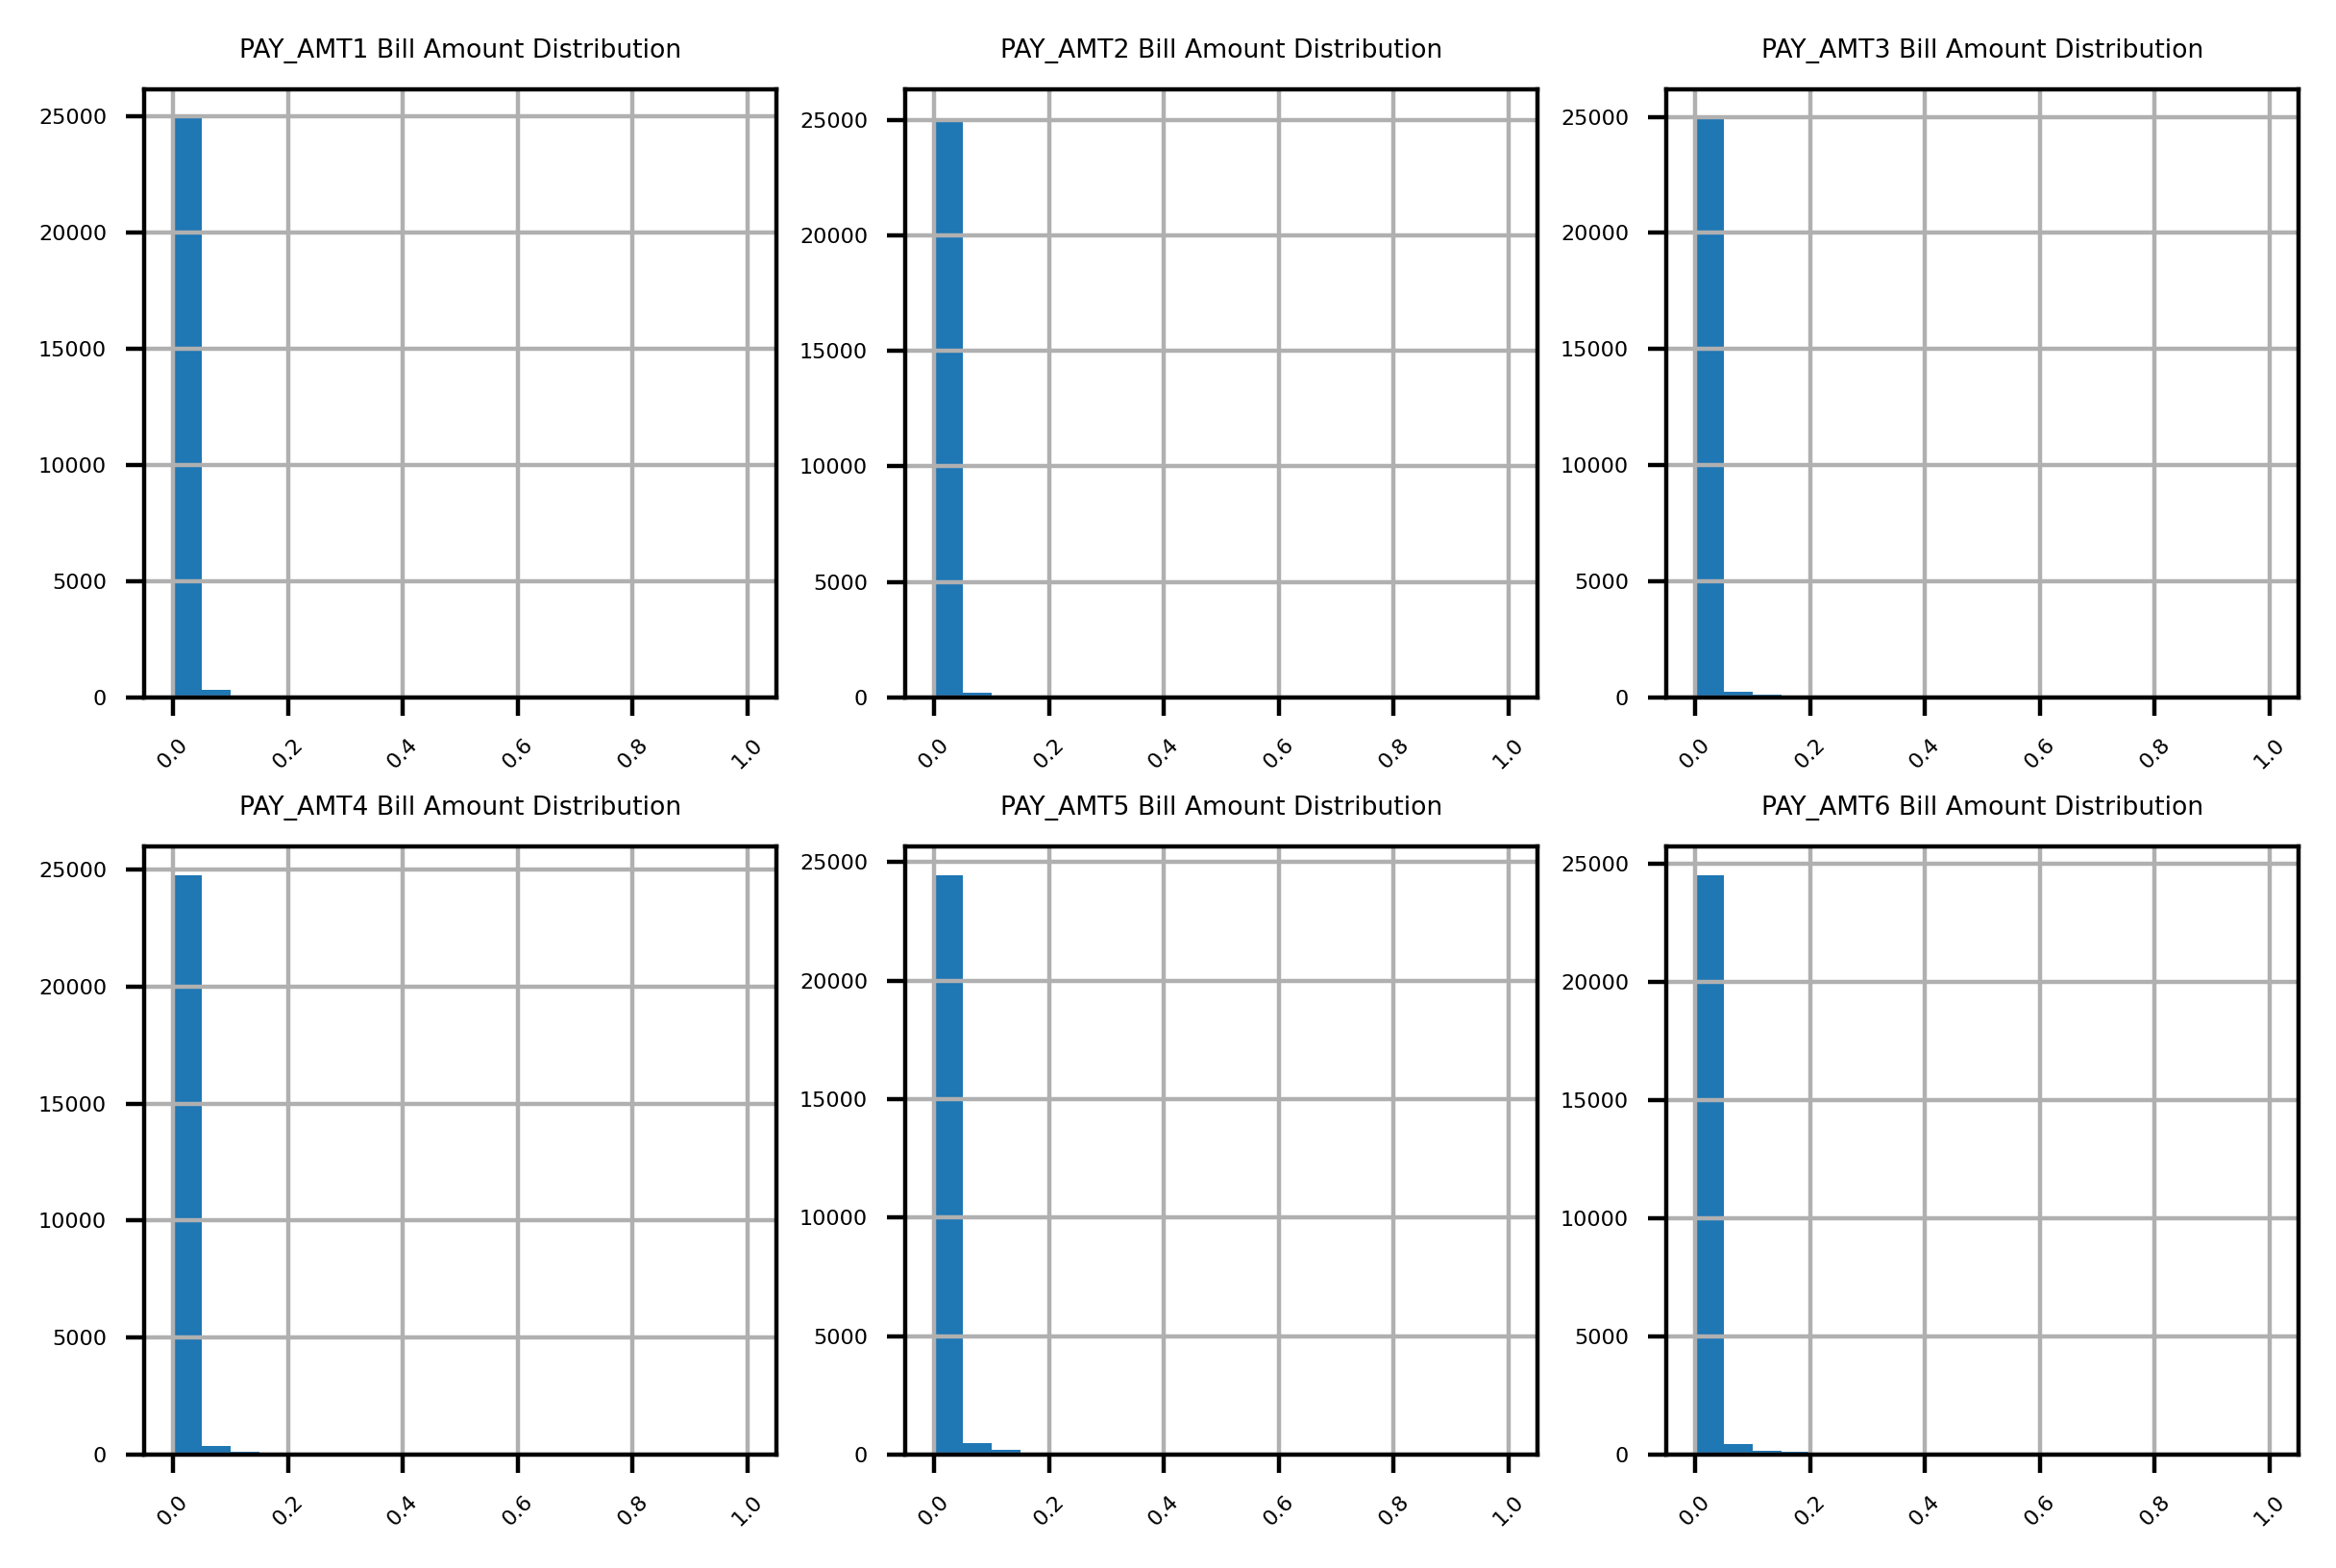

In [22]:
draw_histograms(df2,pay_amt_feats,2,3,45)